# Loading Surface Models in OBJ format

#### An example showing loading and viewing of the dataset included in this PeerJ article https://peerj.com/articles/355/
### *"An interactive three dimensional approach to anatomical description—the jaw musculature of the Australian laughing kookaburra (Dacelo novaeguineae)"*  Michelle R. Quayle, David G. Barnes, Owen L. Kaluza, Colin R. McHenry 2014

LavaVu includes built in support for loading 3D surface models in Wavefront OBJ files.

For other formats/sources of surface data we can load them using python libraries and send them to LavaVu but this is covered in other tutorials.

**First we create a data structure to organise the data elements and recreate the muscle groups from the paper**

In [ ]:
#Organise the data by muscle group and provide group names and colours for elements
dataset = {}
dataset[""] = [("Mandible.obj", [233,215,182]),
               ("Cranium-reduced-100k.obj", [233,215,182])]

dataset["Depressor Muscles"] = [("1. Depressor Mandibulae.obj", [0.82,0.05,0.11])]

dataset["Temporal muscles"] = [("2. Adductor Mandibulae Externus profundus.obj", [0.93,0.40,0.43]),
    ("3. Adductor Mandibulae Externus superficialis.obj", [0.76,0.49,0.48]),
    ("4. Unnamed Temporal muscle.obj", [0.70,0.29,0.30]),
    ("5. Adductor Mandibulae Posterior.obj", [1.00,0.00,0.46])]

dataset["Pseudotemporalis muscles"] = [("6. Pseudotemporalis superficialis.obj", [0.91,0.43,0.46,1.0]),
    ("7. Pseudotemporalis profundus.obj", [0.87,0.64,0.67,1.0])]

dataset["Dorsal Pterygoid muscles"] = [("8. Pterygoideus Dorsalis Medialis anterior.obj", [0.89,0.56,0.76,1.0]),
    ("9. Pterygoideus Dorsalis Medialis posterior.obj", [1.00,0.00,0.10,1.0]),
    ("10. Pterygoideus Dorsalis Lateralis.obj", [0.89,0.33,0.67,1.0])]

dataset["Pterygoid Muscles"] = [("11. Pterygoideus Ventralis Medialis.obj", [1.00,0.59,0.00,1.0]),
    ("12. Pterygoideus Ventralis lateralis.obj", [0.91,0.47,0.25,1.0]), 
    ("13. Pterygoideus Ventralis lateralis Part2.obj", [0.86,0.58,0.36,1.0]),
    ("14. Pterygoideus Ventralis lateralis Part3.obj", [0.78,0.49,0.32,1.0])]

**Now lets download the data set from github**

In [ ]:
#Download the files if they don't already exist, LavaVu includes a handy function to do just this
import lavavu
source = 'https://github.com/cave2/websurfer/raw/master/examples/quayle_kookaburra/'
for group in dataset:
    for el in dataset[group]:
        fn = el[0]
        lavavu.download(source + fn)

Mandible.obj exists, skipped downloading.
Cranium-reduced-100k.obj exists, skipped downloading.
1. Depressor Mandibulae.obj exists, skipped downloading.
2. Adductor Mandibulae Externus profundus.obj exists, skipped downloading.
3. Adductor Mandibulae Externus superficialis.obj exists, skipped downloading.
4. Unnamed Temporal muscle.obj exists, skipped downloading.
5. Adductor Mandibulae Posterior.obj exists, skipped downloading.
6. Pseudotemporalis superficialis.obj exists, skipped downloading.
7. Pseudotemporalis profundus.obj exists, skipped downloading.
8. Pterygoideus Dorsalis Medialis anterior.obj exists, skipped downloading.
9. Pterygoideus Dorsalis Medialis posterior.obj exists, skipped downloading.
10. Pterygoideus Dorsalis Lateralis.obj exists, skipped downloading.
11. Pterygoideus Ventralis Medialis.obj exists, skipped downloading.
12. Pterygoideus Ventralis lateralis.obj exists, skipped downloading.
13. Pterygoideus Ventralis lateralis Part2.obj exists, skipped downloading.


**Import LavaVu and create a Viewer**

The returned Viewer object can be used to set global properties  
The available properties are listed here https://mivp.github.com/LavaVu-Documentation/Property-Reference

In [ ]:
#Load LavaVu, setting a custom background colour
import lavavu
lv = lavavu.Viewer(background="grey80")

#With this setting the OBJ loader will ignore the normals 
#in the OBJ file and recalculate them, it's usually not necessary but
#the downloaded model only has facet normals on the vertices.
#We get nicer lighting by getting LavaVu to calculate the correct vertex normals.
lv["trisplit"] = 1

#Flip the Y and Z axes on surface load
lv["swapyz"] = True

**Load the OBJ files**

The first two files are loaded with the Viewer object, files loaded this way will automatically have a visualisation object created for each file loaded

The rest of the files are ordered by their muscle group, we create a visualisation object to hold the group and then load all the related files into that object

In [ ]:
#Start with the Viewer object
obj = lv
for group in dataset:
    #Has a group name? create a vis object for the group
    if len(group):
        print("Creating:" + group)
        #Following files will be loaded into this object
        # creating a composite of the loaded surfaces
        obj = lv.triangles(group)

    #Load the list of files
    for el in dataset[group]:
        fn = el[0]
        colour = el[1]
        obj.file(fn, colours=[colour])
        if len(group): obj["opacity"] = 1.0

Creating:Depressor Muscles
Creating:Temporal muscles
Creating:Pseudotemporalis muscles
Creating:Dorsal Pterygoid muscles
Creating:Pterygoid Muscles


**Lets have a look at what we have so far**

The display function renders an image and shows it inline in the notebook, the output resolution can optionally be specified


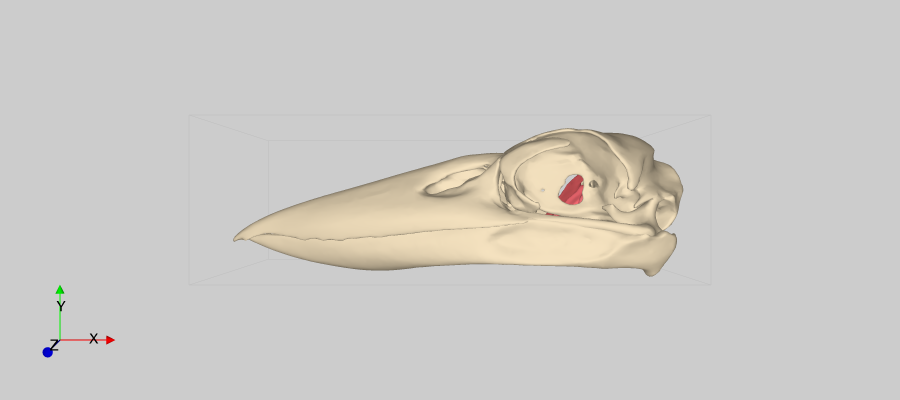

In [ ]:
lv.display(resolution=[900,400])

**Script commands can be used to control the viewer state**

Here we set the camera rotation and translation, turn off the border and axis and turn on the key listing rendered objects 

See the docs for a list of the available commands https://mivp.github.com/LavaVu-Documentation/Scripting-Commands-Reference


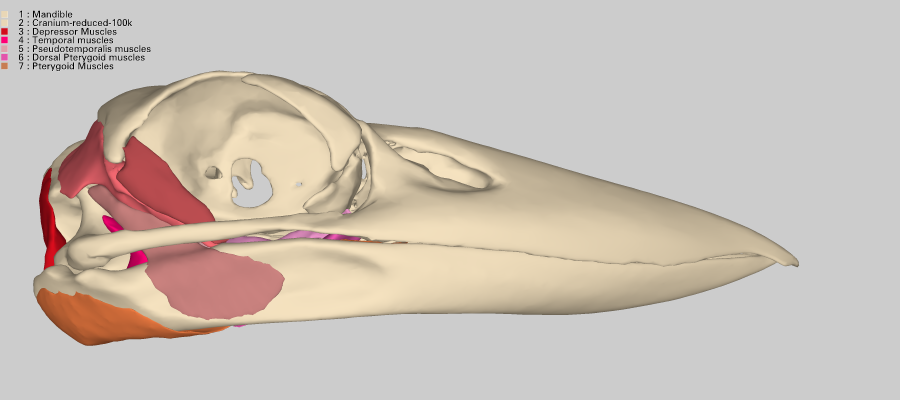

In [ ]:
lv.translation(0, 0, -80)
lv.rotation(0, 180, 0)

lv.border(0)
lv.axis('off')
lv.list('objects')

lv.display(resolution=[900,400])

**Modify visualisation objects**

We can get the list of loaded objects and retrieve them by name

Properties can also be set on vis objects (https://mivp.github.com/LavaVu-Documentation/Property-Reference#object)

dict_keys(['Mandible', 'Cranium-reduced-100k', 'Depressor Muscles', 'Temporal muscles', 'Pseudotemporalis muscles', 'Dorsal Pterygoid muscles', 'Pterygoid Muscles'])



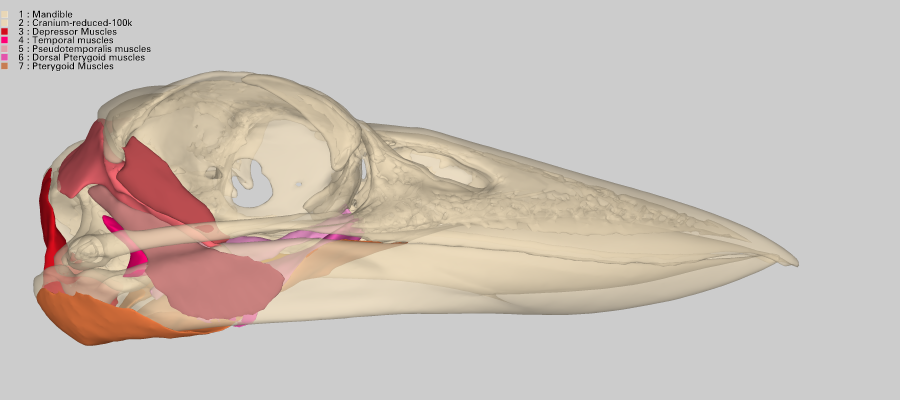

In [ ]:
print(lv.objects)

mandible = lv.objects["Mandible"]
cranium = lv.objects["Cranium-reduced-100k"]

mandible["opacity"] = 0.5
cranium["opacity"] = 0.5

lv.reload() #Some settings require data to be reloaded
lv.display(resolution=[900,400])

**Interactive controls**

An interactive window can be displayed allowing mouse interaction with the viewer within the notebook

All the properties and commands mentioned above can be attached to HTML controls which adjust the display properties

In [ ]:
lv.control.Panel() #Panel includes a right-aligned interactive window with a container for controls to the left
lv.control.ObjectList()
lv.control.Range('alpha', label="Global Opacity")
cranium.control.Range('opacity', label="Cranium Opacity", command="reload")
lv.control.Range('specular', range=(0,1), step=0.1, value=0)
lv.control.DualRange(['xmin', 'xmax'], label="x clip", step=0.01, values=[0.0,1.0])
lv.control.DualRange(['ymin', 'ymax'], label="y clip", step=0.01, values=[0.0,1.0])
lv.control.DualRange(['zmin', 'zmax'], label="z clip", step=0.01, values=[0.0,1.0])
lv.control.Range(command='background', range=(0,1), step=0.1, value=0.8)
lv.control.Checkbox(command="list objects", label="Key", value=True)
lv.control.show() #Show the control panel, including the viewer window
lv.translation(0, 0, -120) #Zoom out a little to fit the smaller view window

In [9]:
lv.webgl()